# Chest X-Ray Pneumonia Binary Classification

Source: `paultimothymooney/chest-xray-pneumonia` on Kaggle.com

Derived from binary image classification example [here](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%202%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=0oj0gTIy4k60).

In [1]:
%load_ext lab_black

In [2]:
import os
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

tf.random.set_seed(1)

In [3]:
print(len(os.listdir("data-vol-1/chest_xray/chest_xray/train/NORMAL")))
print(len(os.listdir("data-vol-1/chest_xray/chest_xray/train/PNEUMONIA")))

1342
3876


In [4]:
base_dir = "data-vol-1/chest_xray/chest_xray/"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

test_normal_dir = os.path.join(test_dir, "NORMAL")
test_pneumonia_dir = os.path.join(test_dir, "PNEUMONIA")

train_normal_fnames = os.listdir(train_normal_dir)
train_pneumonia_fnames = os.listdir(train_pneumonia_dir)

print(len(os.listdir(train_normal_dir)) + len(os.listdir(train_pneumonia_dir)))
print(len(os.listdir(test_normal_dir)) + len(os.listdir(test_pneumonia_dir)))

5218
624


In [5]:
pic_index = 0

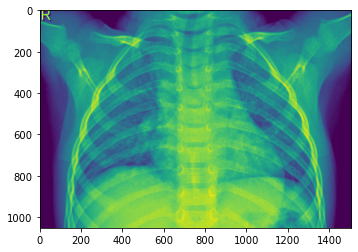

In [6]:
# NORMAL X-Ray Example

img_path = os.path.join(train_normal_dir, train_normal_fnames[pic_index])

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

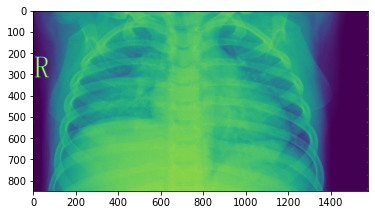

In [7]:
# PNEUMONIA X-Ray Example

img_path = os.path.join(train_pneumonia_dir, train_pneumonia_fnames[pic_index])

img = mpimg.imread(img_path)
plt.imshow(img)

plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [10]:
model.compile(
    optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=200,
    epochs=6,
    #     validation_steps=50,
    #     verbose=2,
)

Epoch 1/6
200/200 [==============================] - 47s 235ms/step - loss: 0.2960 - accuracy: 0.8859 - val_loss: 1.2205 - val_accuracy: 0.6827
Epoch 2/6
200/200 [==============================] - 47s 236ms/step - loss: 0.1316 - accuracy: 0.9517 - val_loss: 1.1372 - val_accuracy: 0.7821
Epoch 3/6
200/200 [==============================] - 46s 232ms/step - loss: 0.1130 - accuracy: 0.9640 - val_loss: 1.0722 - val_accuracy: 0.7708
Epoch 4/6
200/200 [==============================] - 48s 239ms/step - loss: 0.0938 - accuracy: 0.9660 - val_loss: 1.5543 - val_accuracy: 0.7436
Epoch 5/6
200/200 [==============================] - 47s 234ms/step - loss: 0.0700 - accuracy: 0.9747 - val_loss: 1.3404 - val_accuracy: 0.7532
Epoch 6/6
200/200 [==============================] - 47s 234ms/step - loss: 0.0637 - accuracy: 0.9785 - val_loss: 1.7506 - val_accuracy: 0.7308


Text(0.5, 1.0, 'Training and validation loss')

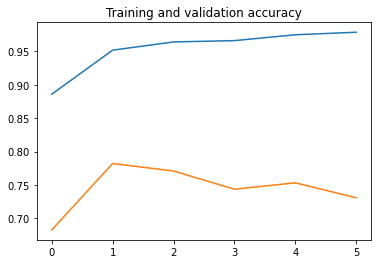

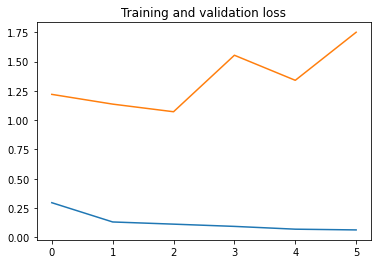

In [12]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")